# Από τους Νευρώνες στα <br/>Νευρωνικά Δίκτυα Α'

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Η βασική υπολογιστική μονάδα της ανθρώπινης σκέψης είναι ο *νευρώνας*  (neuron).

* Υπάρχουν περίπου 86 δισεκατομμύρια νευρώνες στον ανθρώπινο εγκέφαλο.

* Συνδέονται μεταξύ τους με $10^{14}$&ndash;$10^{15}$ *συνάψεις* (synapses).

* Όπως έγραψε η Emily Dickinson (1830–86):
> The brain is wider than the sky.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width="600px"/>

Πηγή: [Wikipedia](https://en.wikipedia.org/wiki/Neuron#/media/File:Blausen_0657_MultipolarNeuron.png).

* Ένας τεχνητός νευρώνας είναι ένα απλουστευμένο μοντέλο του βιολογικού νευρώνα.

* Η βασική ιδέα δεν είναι νέα: η πρώτη περιγραφή τεχνητού νευρώνα είναι από το 1943 από του Warren McCulloch and Walter Pitts!

<img src="artificial_neuron.png" width="300px"/>

* Ο νευρώνας έχει εισόδους $x_1, x_2, \ldots, x_n$.

* Κάθε είσοδος έχει ένα *βάρος* (weight). Άρα έχουμε βάρη $w_1, w_2, \ldots, w_n$.

* Ο νευρώνας παίρνει κάθε είσοδο και την πολλαπλασιάζει με το αντίστοιχο βάρος.

* Στη συνέχεια αθροίζει τα γινόμενα, παράγοντας τη *σταθμισμένη είσοδο* (weighted input) του νευρώνα.

* Σε αυτό προσθέστει στη σταθμισμένη είσοδο μία *πόλωση* (bias) ή *κατώφλι* (threshold), ώστε να έχουμε:

$$ w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b$$


* Συνήθως χρησιμοποιούμε διανύσματα και πίνακες για να να περιγράφουμε τη λειτουργία των νευρωνικών δικτύων.

* Έστω $\mathbf{w} = [ w_1, w_2, \ldots, w_n ]$ τα βάρη.

* Έστω $\mathbf{x} = [ x_1, x_2, \ldots, x_n ]$ οι είσοδοι.

* Τότε οι πράξεις που περιγράψαμε είναι το εσωτερικό γινόμενο των δύο διανυσμάτων συν την πόλωση:

$$\mathbf{w} \cdot \mathbf{x} + b = \sum_{i=1}^{n}{w_i x_i} + b$$

* Όπως η έξοδος ενός βιολογικού νευρώνα εξαρτάται από τις εισόδους του, έτσι και η έξοδος του τεχνητού νευρώνα εξαρτάται από τις εισόδους του.

* Αυτό στον τεχνητό νευρώνα γίνεται δίνοντας το αποτέλεσμα που μέχρι τώρα έχει υπολογίσει σε μία ειδική *συνάρτηση ενεργοποίησης* (activation function).

* Το αποτέλεσμα της συνάρτησης ενεργοποίησης είναι η έξοδος του (τεχνητού) νευρώνα.

<img src="artificial_neuron_innards.png" width="500px"/>

* Η απλούστερη συνάρτηση ενεργοποίησης είναι η συνάρτηση βήματος, που μας δίνει ως αποτέλεσμα 0 ή 1. 

* Ο νευρώνας έχει έξοδο ένα όταν η είσοδος στη συνάρτηση ενεργοποίησης είναι μεγαλύτερη από το μηδέν, διαφορετικά η έξοδος είναι μηδέν.

$$
 y = 
  \begin{cases} 
   0 & \sum_j{w_j x_j} + b \le 0 \\
   1 & \sum_j{w_j x_j} +b > 0
  \end{cases}
$$

* Ή:

$$
 y = 
  \begin{cases} 
   0 & \sum_j{w_j x_j} \le -b \\
   1 & \sum_j{w_j x_j} > -b
  \end{cases}
$$

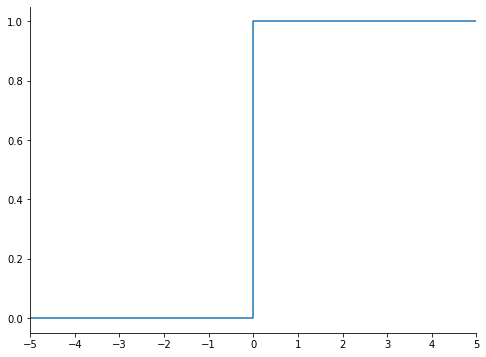

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 0, 50)
y = np.zeros_like(x)
all_x = np.append(x, -x[::-1])
all_y = np.append(y, np.ones_like(-x[::-1]))
_ = plt.plot(all_x, all_y)

* Γιατί τα λέμε όλα αυτά;

* Τα τεχνητά νευρωνικά δίκτυα μπορεί να είναι μαύρα κουτιά, πρέπει να έχουμε μία ιδέα του πώς λειτουργούν εσωτερικά.

* Για να κατασκευάσουμε τεχνητά νευρωνικά δίκτυα, δεν χρειάζεται να κατασκευάσουμε στην κυριολεξία τεχνητούς νευρώνες.

* Όπως είδαμε, ένας νευρώνας δεν κάνει τίποτε άλλο από το να υπολογίζει μια απλή μαθηματική συνάρτηση. Άρα μπορούμε να τον υλοποιήσουμε ανέτως σε μία γλώσσα προγραμματισμού.

* Με αυτά τα λίγα λόγια θεωρίας, θα προχωρήσουμε ευθύς αμέσως στην πράξη.